<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/7_Desicion_Trees_and_KNN_CLassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/defaulter.csv")

In [ ]:
df.head()

,balance,income,student_Yes,defaulter_Yes
0,729.526495,44361.62507,False,False
1,817.180407,12106.13470,True,False
2,1073.549164,31767.13895,False,False
3,529.250605,35704.49394,False,False
4,785.655883,38463.49588,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [ ]:
print("Shape:", df.shape)

Shape: (10000, 4)


In [ ]:
print(df.isnull().sum())

defaulter    0
student      0
balance      0
income       0
dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['student'], drop_first=True)
df = pd.get_dummies(df, columns=['defaulter'], drop_first=True)

In [ ]:
X=df.drop("defaulter_Yes",axis=1)

In [ ]:
y=df["defaulter_Yes"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)



In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[['balance', 'income']] = sc.fit_transform(X_train[['balance', 'income']])
X_test[['balance', 'income']] = sc.transform(X_test[['balance', 'income']])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736666666666667

Confusion Matrix:
 [[2889   20]
 [  59   32]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      2909
        True       0.62      0.35      0.45        91

    accuracy                           0.97      3000
   macro avg       0.80      0.67      0.72      3000
weighted avg       0.97      0.97      0.97      3000



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/pima-indians-diabetes.csv")

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/pima-indians-diabetes.csv")  # replace with your path
 # check target distribution


In [ ]:

print(df.shape)
print(df.info())
print(df['class'].value_counts())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
class
0    500
1    268
Name: count, dtype: int64


In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop("class", axis=1)  # all columns except target
y = df["class"]               # target


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467

Confusion Matrix:
 [[80 19]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



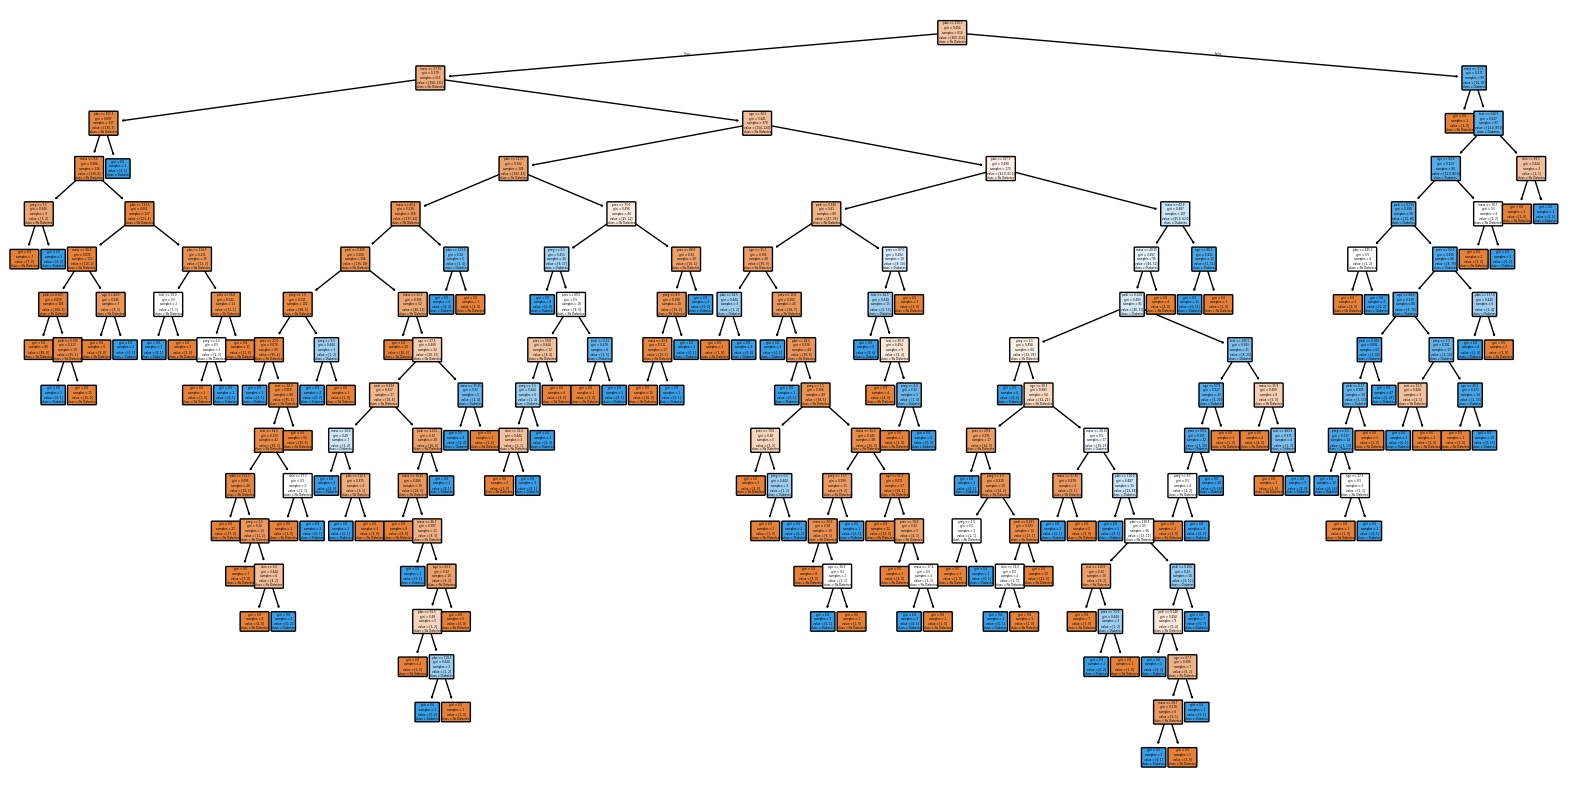

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               filled=True,
               feature_names=X_train.columns,
               class_names=[str(cls) for cls in y_train.unique()])
plt.show()